In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import files

files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gurrammoneshreddy","key":"07c1fc0cfb350a06adaba20bc6321c0d"}'}

In [5]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download rajeshrampure/zomato-dataset

Dataset URL: https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset
License(s): CC0-1.0
 78% 69.0M/89.0M [00:00<00:00, 715MB/s]
100% 89.0M/89.0M [00:00<00:00, 606MB/s]


In [7]:
!unzip zomato-dataset.zip

Archive:  zomato-dataset.zip
  inflating: zomato.csv              


In [8]:
data = pd.read_csv("zomato.csv")

data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
data.shape

(51717, 17)

In [12]:
data.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [13]:
# reomve columns
data.drop(['url','address','menu_item','phone','dish_liked'],axis=1,inplace=True)

In [14]:
data.shape

(51717, 12)

In [15]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [16]:
# reanme columns
data.rename(columns={"name":"restaurent",
                     "rate":"rating",
                     "cuisines":"food_type",
                     "listed_in(type)":"type",
                     "listed_in(city)":"city",
                     "approx_cost(for two people)":"cost"},inplace=True)

In [17]:
data.head()

,restaurent,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [18]:
data.isna().sum().sum()

np.int64(8414)

In [19]:
data.dropna(inplace=True)

In [20]:
data.shape

(43533, 12)

In [21]:
data.groupby('restaurent').count()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
restaurent,,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
i-Bar - The Park Bangalore,11,11,11,11,11,11,11,11,11,11,11
iFruit Live Ice Creams,4,4,4,4,4,4,4,4,4,4,4
iSpice Resto Cafe,7,7,7,7,7,7,7,7,7,7,7


In [22]:
data['restaurent'] = data['restaurent'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [23]:
data.groupby('restaurent').count()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
restaurent,,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
i-Bar - The Park Bangalore,11,11,11,11,11,11,11,11,11,11,11
iFruit Live Ice Creams,4,4,4,4,4,4,4,4,4,4,4
iSpice Resto Cafe,7,7,7,7,7,7,7,7,7,7,7


In [24]:
data['restaurent']=data['restaurent'].str.replace('-','')
data['restaurent']=data['restaurent'].str.replace('caf','cafe')

In [25]:
data.groupby('restaurent').count()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
restaurent,,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2,2
#L81 Cafe,9,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
iBar The Park Bangalore,11,11,11,11,11,11,11,11,11,11,11
iFruit Live Ice Creams,4,4,4,4,4,4,4,4,4,4,4
iSpice Resto Cafe,7,7,7,7,7,7,7,7,7,7,7


In [26]:
data.online_order.unique()

array(['Yes', 'No'], dtype=object)

In [27]:
data.book_table.unique()

array(['Yes', 'No'], dtype=object)

In [28]:
data.rating.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [29]:
replace = lambda x:x.replace('/5',"")
l = []
for val in map(replace,data['rating']):
    if val != 'NEW' and val != '-':
        var = float(val)
    l.append(var)
data['rating'] = l

In [30]:
data.rating.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [31]:
data['votes'].isnull().value_counts()

,count
votes,
False,43533


In [32]:
data.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [33]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [34]:
data.food_type.unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [35]:
data.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [36]:
data['cost'] = data['cost'].apply(lambda x:x.replace(",","")).astype(int)

In [37]:
data.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500])

In [38]:
data.cost.dtype

dtype('int64')

In [39]:
data.columns

Index(['restaurent', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'food_type', 'cost', 'reviews_list', 'type',
       'city'],
      dtype='object')

In [40]:
data.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [41]:
data.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [42]:
data.duplicated().value_counts()

,count
False,43484
True,49


In [43]:
data.drop_duplicates(keep='last',inplace=True)
data.reset_index(drop=True,inplace=True)

In [44]:
data.duplicated().value_counts()

,count
False,43484


In [45]:
data.to_csv("zomato_clean.csv")

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("zomato_clean.csv")
data.head()

,Unnamed: 0,restaurent,online_order,book_table,rating,votes,location,rest_type,food_type,cost,reviews_list,type,city
0,0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [48]:
data.shape

(43484, 13)

In [49]:
data.online_order.value_counts()

,count
online_order,
Yes,28163
No,15321


<Axes: xlabel='online_order'>

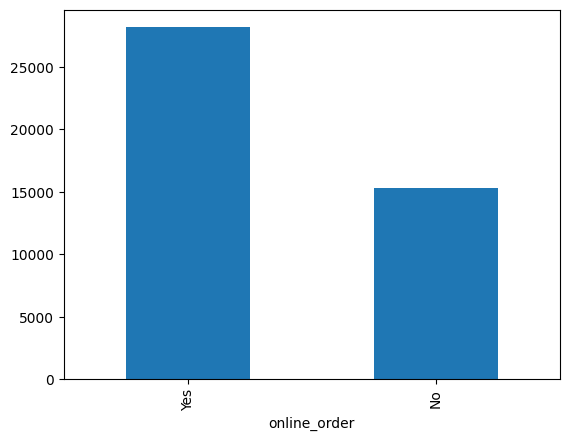

In [50]:
data.online_order.value_counts().plot(kind ='bar')

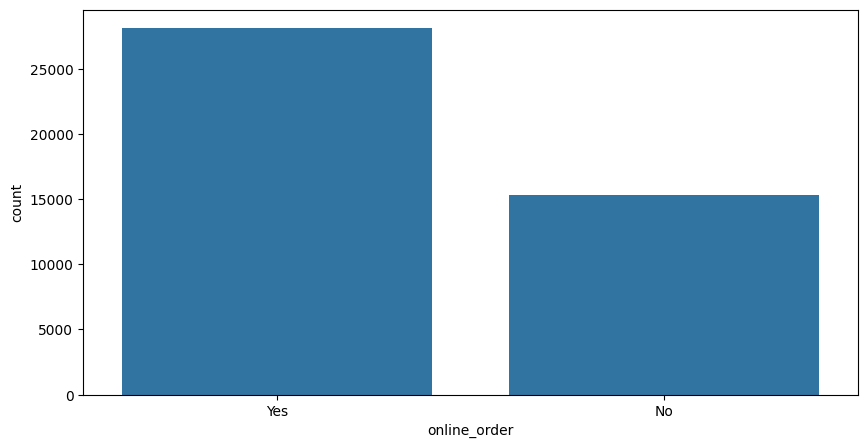

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='online_order',data=data)
plt.show()

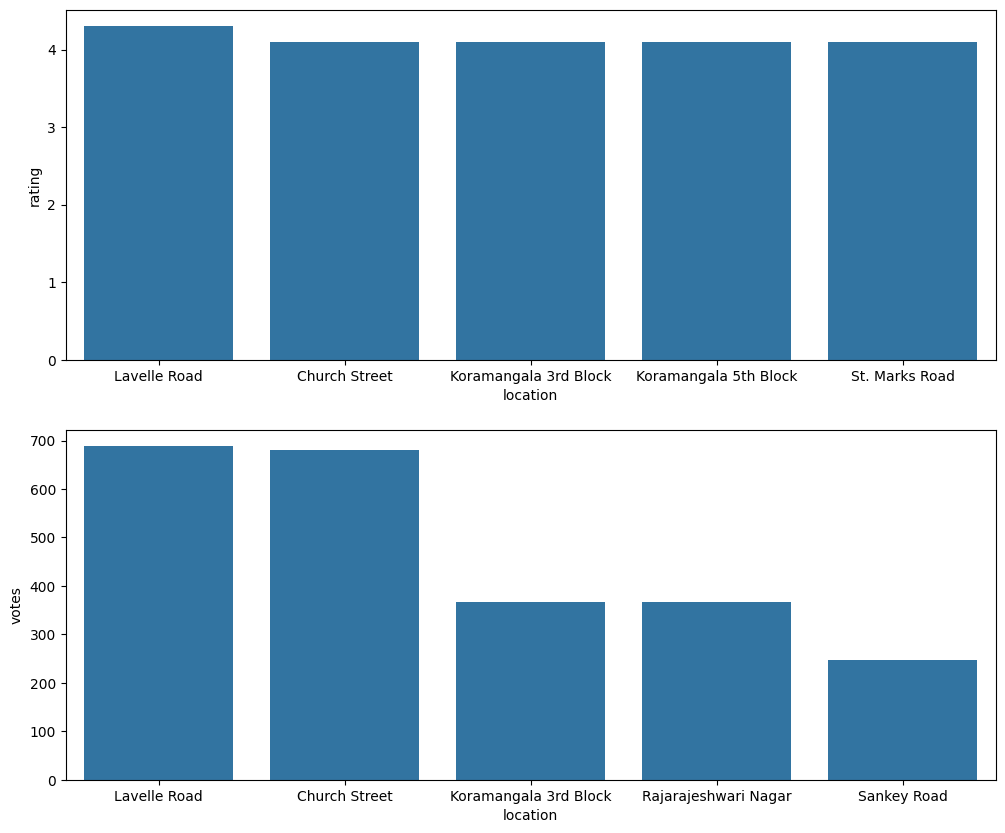

In [52]:
plt.figure(figsize=(12,10)) # seeting graph size using matplotlib
ax = plt.subplot(2,1,1)   # use of Subploting


# sorting location on avg of ratings in descending order and reading first 5 values
loc_rating=data.groupby('location').agg({'rating':'median'})
rating_sorted_loc=loc_rating.sort_values('rating',ascending=False).head(5).reset_index()

# ploting graph using seaborn
sns.barplot(x='location',y='rating',data=rating_sorted_loc)


ax = plt.subplot(2,1,2)

# sorting location on avg of votes in descending order and reading first 5 values
loc_votes=data.groupby('location').agg({'votes':'median'})
votes_sorted_loc=loc_votes.sort_values('votes',ascending=False).head(5).reset_index()

# ploting graph using seaborn
sns.barplot(x='location',y='votes',
            data=votes_sorted_loc)
plt.show()

(np.int64(87), <Axes: xlabel='restaurent', ylabel='rest_type'>)

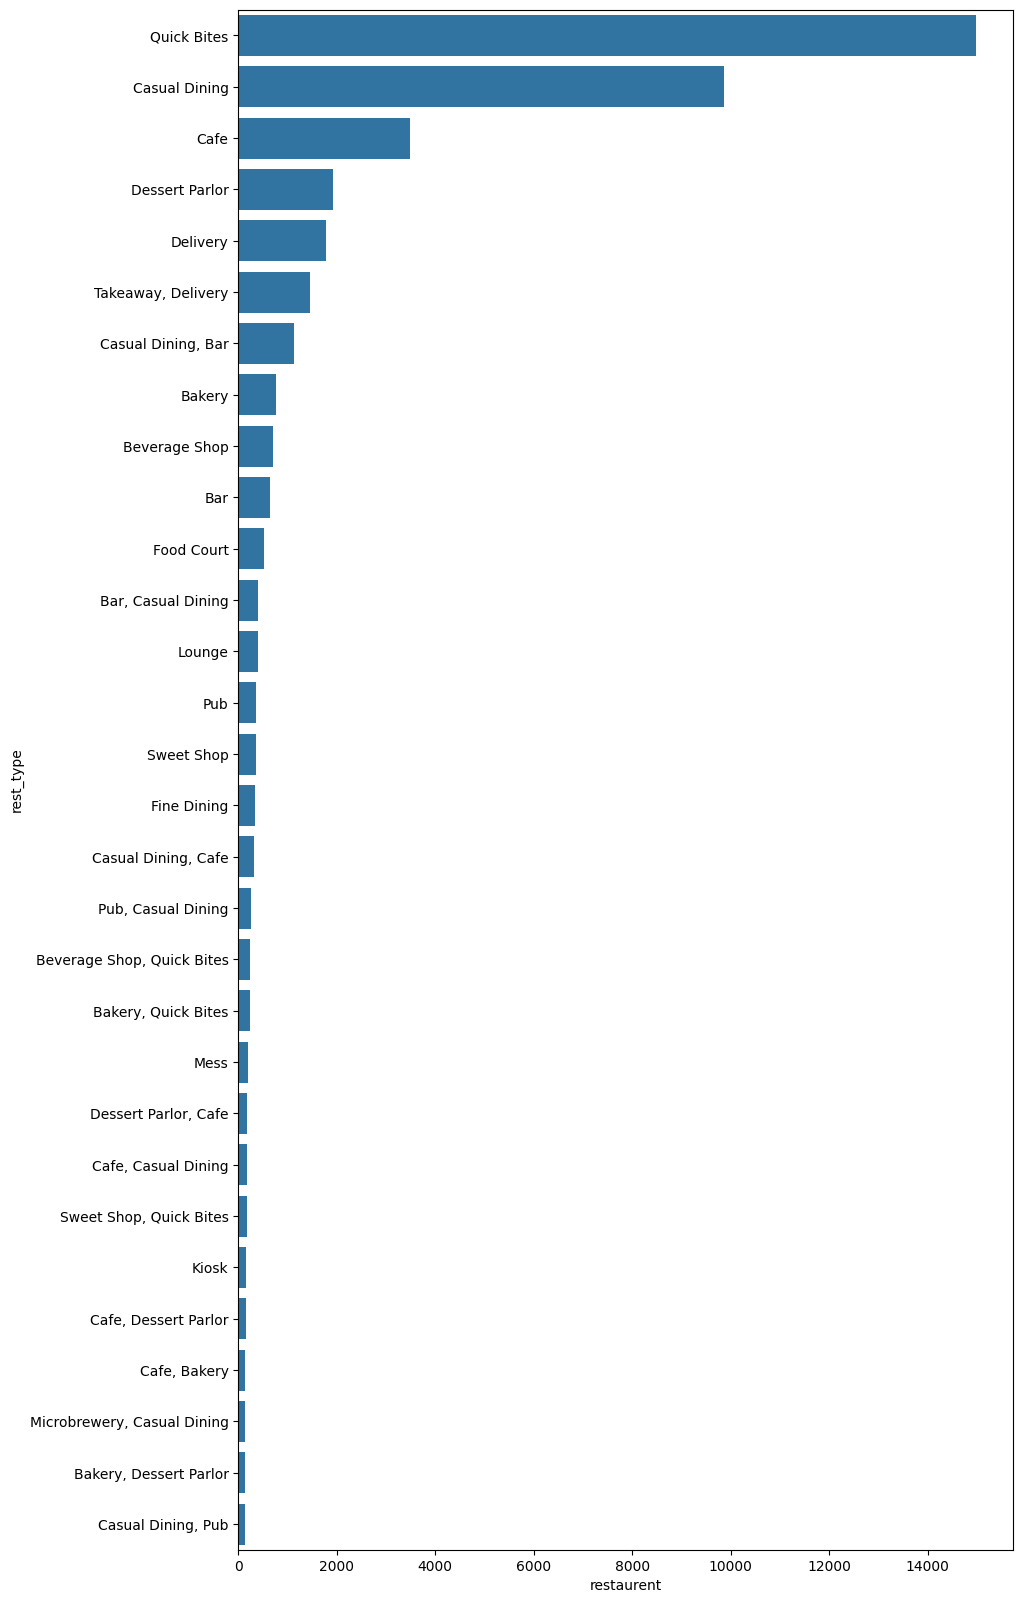

In [53]:
plt.figure(figsize=(10,20))
rest_types = data.groupby('rest_type')['restaurent'].count().reset_index()
sorted_rest_types = rest_types.sort_values('restaurent',ascending=False).head(30)
#print(sorted_rest_types)

rest_types.rest_type.count(), sns.barplot(x='restaurent',y='rest_type',data = sorted_rest_types, orient='h')

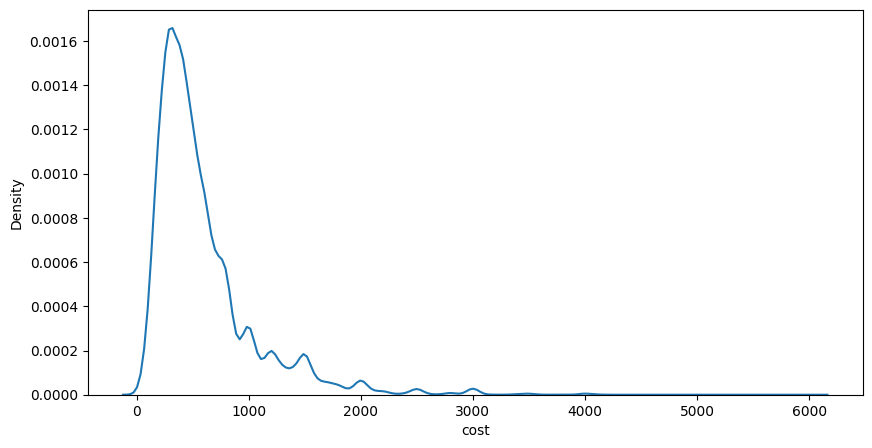

In [54]:
plt.figure(figsize=(10,5))
sns.kdeplot(x='cost',data=data)
plt.show()

In [55]:
data['book_table'].value_counts()

,count
book_table,
No,37062
Yes,6422


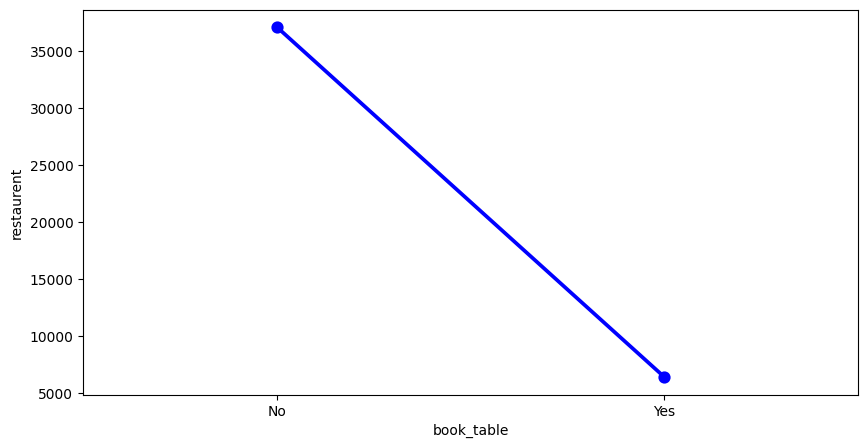

In [56]:
plt.figure(figsize=(10,5))
table_booking = data.groupby('book_table')['restaurent'].count().reset_index()

sns.pointplot(x='book_table',y='restaurent',color='b',data=table_booking)
plt.show()

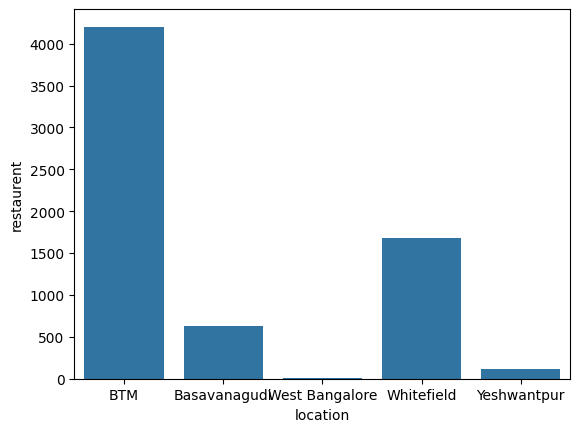

In [57]:
df=pd.DataFrame(data.groupby('location')['restaurent'].count()).reset_index()

criteria=df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur'])

sns.barplot(x='location',y='restaurent',data=df[criteria])
plt.show()